# Introdução


Olá, seja bem-vinda e bem-vindo ao notebook da **aula 04!** A partir desta aula iremos analisar e discutir um *sample* da base de dados do **ENEM 2018**. Nessa aula vamos falar sobre diversos temas importantes na área de IA, então **acompanhar esses explicações pela videoaula será importante para o seu desenvolvimento**.

#Aula 4

Aqui iremos explorar e conhecer uma pequena amostra da base de dados do **ENEM 2018**. Esse será o primeiro passo para construir os **modelos de machine learning da aula 05**. Se você quiser estudar o código utilizado para criar o dataset desta aula, pode acessar este [**link aqui**](https://github.com/guilhermesilveira/enem-2018).

Vamos iniciar setando a precisão de casas decimais que o pandas irá exibir os dados (`pd.options.display.float_format`), depois lendo e conhecendo as informações contidas na base de dados.



In [1]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "../datasets/enem-2018/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
dados = pd.read_csv(uri)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,...,A,B,A,A,D,B,B,B,A,A


Conheça todas as colunas do nosso dataframe:

In [2]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

Na videoaula tivemos uma discussão muito bacana sobre uma visão geral dos dados e sua organização, e sobre ética na IA. Se você não assistiu eu recomendo que veja, não cabe aqui no notebook reproduzir a conversa, então vamos seguir com o  desenvolvimento.


Conhecidas as informações, vamos chamar o **describe()** para analisá-las. Se atente ao detalhe que o **describe** só gera informação de dados numéricos!

In [3]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00",...,"97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,...,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,...,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,...,455.60,0.00,1.00,120.00,40.00,40.00,100.00,40.00,360.00,3.00
50%,"180,010,373,993.50","2,018.00","3,137,700.00",31.00,19.00,0.00,2.00,1.00,"3,126,109.00",31.00,...,516.50,1.00,1.00,120.00,120.00,120.00,120.00,60.00,520.00,4.00
75%,"180,012,032,768.50","2,018.00","3,550,308.00",35.00,24.00,0.00,3.00,1.00,"3,550,308.00",35.00,...,600.00,1.00,1.00,140.00,120.00,120.00,140.00,120.00,620.00,5.00
max,"180,014,002,596.00","2,018.00","5,300,108.00",53.00,78.00,3.00,5.00,4.00,"5,300,108.00",53.00,...,989.90,1.00,9.00,200.00,200.00,200.00,200.00,200.00,"1,000.00",20.00


A saída do `describe` traz várias estatísticas, de forma que algumas não fazem sentido ou não nos interessam neste momento.  Entretanto, se você analisou as últimas colunas, viu que lá temos alguns dados relevantes: notas das provas e redação. 

Desafio você a entrar nos detalhes das análises de notas e diversos outros campos! Como nosso tempo aqui é restrito, vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

Vamos analisar!

In [4]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [5]:
len(dados_notas)

97270

Como queremos analisar as notas detalhadamente, no código acima separamos apenas os dados de interesse. Também removemos todos os valores vazios com o `.dropna()` e trocamos os nomes das colunas para ficar mais legível. 

Por fim, agora nosso DF tem 97270 linhas e 5 colunas.

Agora sim, vamos calcular a correlação usando o `.corr()`:

In [6]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre **linguagem_codigo e ciencias_humanas**, o que parece fazer sentido. Uma correlação que surpreende é entre **linguagem_codigo e redacao**. Embora haja uma correlação maior em relação às outras matérias e redação, eu esperava um valor ainda maior do que o existente. 

**Mais alguma correlação te chama a atenção? **

Eu tenho mais uma análise das correlações em geral! Repare que as correlações com linguagem_codigos sempre são as maiores e isso me faz pensar em várias hipóteses!

Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido).
Será que se eu considerar provas de anos anteriores e comparar as correlações com linguagem_códigos elas serão maiores?

A verdade é que uma simples análise de correlação nos gera diversas hipóteses. **Se tiver curiosidade e quiser fazer essas análises fica como um desafio extra!**

Na videoaula você viu que tentamos plotar diversos gráficos para visualizar a correlação de uma melhor forma. Abaixo seguem os códigos usados:

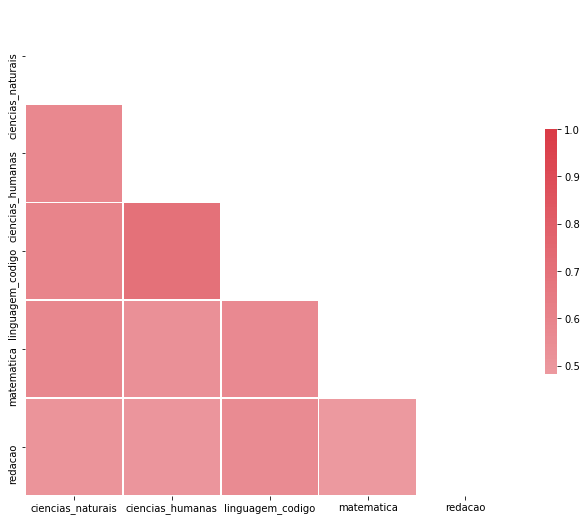

In [7]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()            

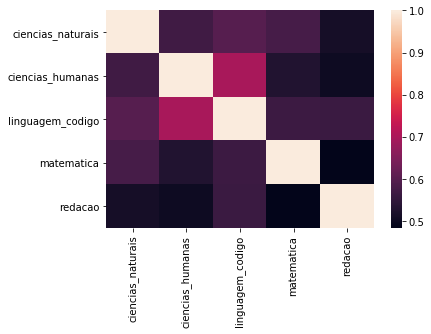

In [8]:
sns.heatmap(corr)
plt.show()

Depois de apanhar tentando criar boas imagens, resolvemos deixar esse desafio para você kkkkk... Resolva e dê aquela cornetada em nosso time uahuahha...

Ok, nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de ML para fazer as predições de algumas notas. Para criar esse modelo de machine learning devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo. 

Então, vamos ao **pairplot**:

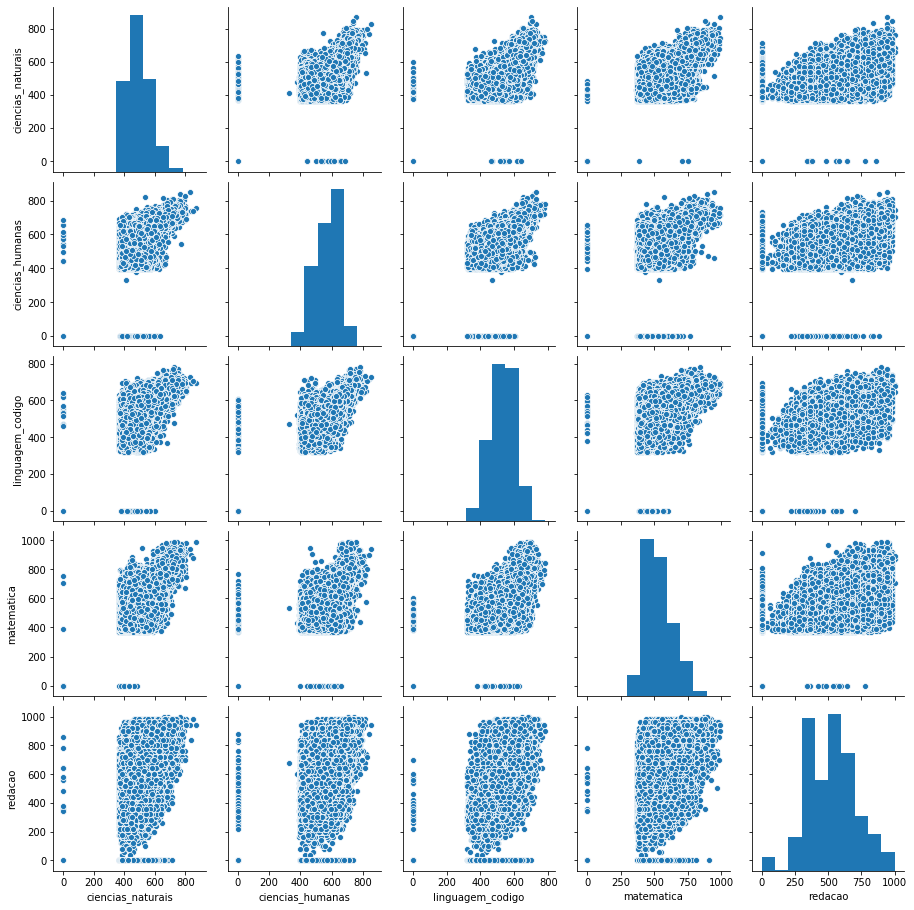

In [9]:
sns.pairplot(dados_notas)
plt.show()

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível (para detalhes das análises, acompanhe a discussão na videoaula).

Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando?

Agora iremos entrar em uma área totalmente nova: o desenvolvimento de modelos de machine learning! Espero que você esteja empolgado(a) para conhecer um pouquinho mais sobre esse assunto!

Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para você.

Até a próxima aula!


P.S: A partir de agora você irá colocar a mão na massa, nossos desafios serão mais analítcos. Queremos que você vivencie o dia-a-dia de um ciêntista de dados, discutindo suas conclusões no Slack e estudando as análises de outros colegas, por isso não haverá gabarito.

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [10]:
len(dados)

137844

In [11]:
dados_notas2 = dados[colunas_de_notas].fillna(0)
dados_notas2.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
len(dados_notas2)

137844

In [12]:
dados_notas2.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,0.00


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

> Sobre o uso de *colormaps* com `sns.heatmap`: (https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/)

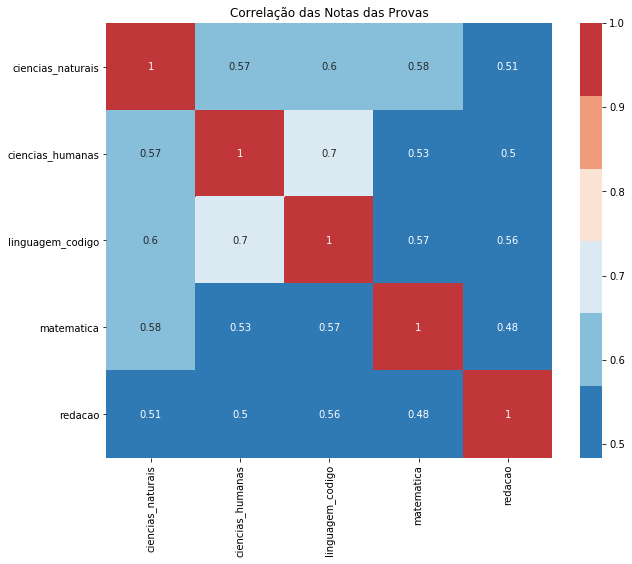

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap=sns.color_palette("RdBu_r", n_colors=6))
plt.title("Correlação das Notas das Provas")
plt.show()

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

> **Resposta:** Para encontrar os acertos, é preciso comparar o texto das colunas de resposta e gabarito, caractere por caractere, de forma que se a resposta foi A e o gabarito estiver A no caractere da mesma posição, então o aluno acertou a questão. Caso contrário, ele errou.
> Caberia aqui uma ressalva para questões que foram anuladas. Nestas análises não temos essas informações, aparentemente.

> Entao primeiro, defini a funcao `count_acertos`, que recebe a resposta e o gabarito em um vetor e conta quantas questoes o usuario acertou.

In [14]:
linha  = ["ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC", "ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD"]

# para contar os acertos, tem subtrair a qtde de caracteres diferentes entre as duas colunas,
# da qtde de caracteres do gabarito
def count_acertos(row):
  return sum([1 for x,y in zip(row[0], row[1]) if x == y])

print("Qtde perguntas Matematica=", len(linha[0]))
print("Acertos Matematica=", count_acertos(linha))

Qtde perguntas Matematica= 45
Acertos Matematica= 22


> Depois, preciso preparar os dados para o cálculo, considerando apenas os alunos presentes (vai remover todos os alunos que não possuem notas nas colunas de notas).

In [15]:
# remover dos dados os alunos que nao tem notas (NaN em todas as notas)
dados_presentes = dados.dropna(subset=colunas_de_notas)

> Por fim, gerar as colunas com a quantidade de acertos por prova, usando o método `apply` nos `dados_presentes` para que seja executada a função  `count_acertos` para cada par de colunas gabarito/respostas. Também foi incluida a coluna de nota em redação, já que para ela não temos nada sobre acertos/erros.

In [16]:
# adicionar colunas para os acertos, com base nas respectivas colunas do gabarito e respostas
dados_presentes.loc[:,"acertos_CN"] = dados_presentes.loc[:,['TX_GABARITO_CN', 'TX_RESPOSTAS_CN']].apply(count_acertos,axis=1)
dados_presentes.loc[:,"acertos_CH"] = dados_presentes.loc[:,['TX_GABARITO_CH', 'TX_RESPOSTAS_CH']].apply(count_acertos,axis=1)
dados_presentes.loc[:,"acertos_LC"] = dados_presentes.loc[:,['TX_GABARITO_LC', 'TX_RESPOSTAS_LC']].apply(count_acertos,axis=1)
dados_presentes.loc[:,"acertos_MT"] = dados_presentes.loc[:,['TX_GABARITO_MT', 'TX_RESPOSTAS_MT']].apply(count_acertos,axis=1)

dados_acertos = dados_presentes.loc[:,["acertos_CN", "acertos_CH", "acertos_LC", "acertos_MT", "NU_NOTA_REDACAO"]]
dados_acertos.rename(columns={"NU_NOTA_REDACAO": "redacao"}, inplace=True)
dados_acertos

/home/lucas/anaconda3/envs/data_science/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lucas/anaconda3/envs/data_science/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,acertos_CN,acertos_CH,acertos_LC,acertos_MT,redacao
1,11,27,33,22,680.00
2,8,9,8,6,600.00
3,7,10,11,10,400.00
6,11,9,15,8,560.00
8,8,12,15,13,660.00
...,...,...,...,...,...
137835,12,15,15,12,520.00
137836,6,12,14,11,580.00
137838,14,17,16,9,820.00
137840,7,11,13,13,380.00


> Então, em `dados_acertos`, temos as colunas com a quantidade de acertos em cada prova e também a nota de redação. Podemos fazer um `describe()` nesse conjunto, para visualizar como eles ficaram.

In [17]:
dados_acertos.describe()

,acertos_CN,acertos_CH,acertos_LC,acertos_MT,redacao
count,"97,270.00","97,270.00","97,270.00","97,270.00","97,270.00"
mean,11.73,16.06,17.07,11.70,516.45
std,4.80,7.26,6.72,4.95,184.09
min,0.00,0.00,0.00,0.00,0.00
25%,9.00,11.00,12.00,8.00,360.00
50%,11.00,15.00,16.00,11.00,520.00
75%,14.00,20.00,22.00,14.00,640.00
max,44.00,45.00,41.00,43.00,"1,000.00"


> Parece que tiveram alunos que não acertaram ou não respoderam nenhuma as questões e isso acontece em todas as provas. Não quero considerar esses alunos no gráfico, então foi remover eles em seguida e verificar novamente.

In [18]:
dados_acertos_sem_zeros = dados_acertos.query("acertos_CN > 0 & acertos_CH > 0 & acertos_LC > 0 & acertos_MT > 0 & redacao > 0")
dados_acertos_sem_zeros.describe()

,acertos_CN,acertos_CH,acertos_LC,acertos_MT,redacao
count,"95,168.00","95,168.00","95,168.00","95,168.00","95,168.00"
mean,11.78,16.17,17.19,11.75,527.37
std,4.81,7.25,6.70,4.97,169.93
min,1.00,1.00,1.00,1.00,40.00
25%,9.00,11.00,12.00,8.00,380.00
50%,11.00,15.00,16.00,11.00,520.00
75%,14.00,21.00,22.00,14.00,640.00
max,44.00,45.00,41.00,43.00,"1,000.00"


> Por esse conjunto de dados, vemos que **pelo menos 75% alunos não acertaram metade das questões**, em todas as provas. Considerando que a média para ser aprovado na maioria das escolhas é 5/10, acho que isso é bem preocupante.

> Finalmente, gerar o `pairplot` desses dados de acertos.

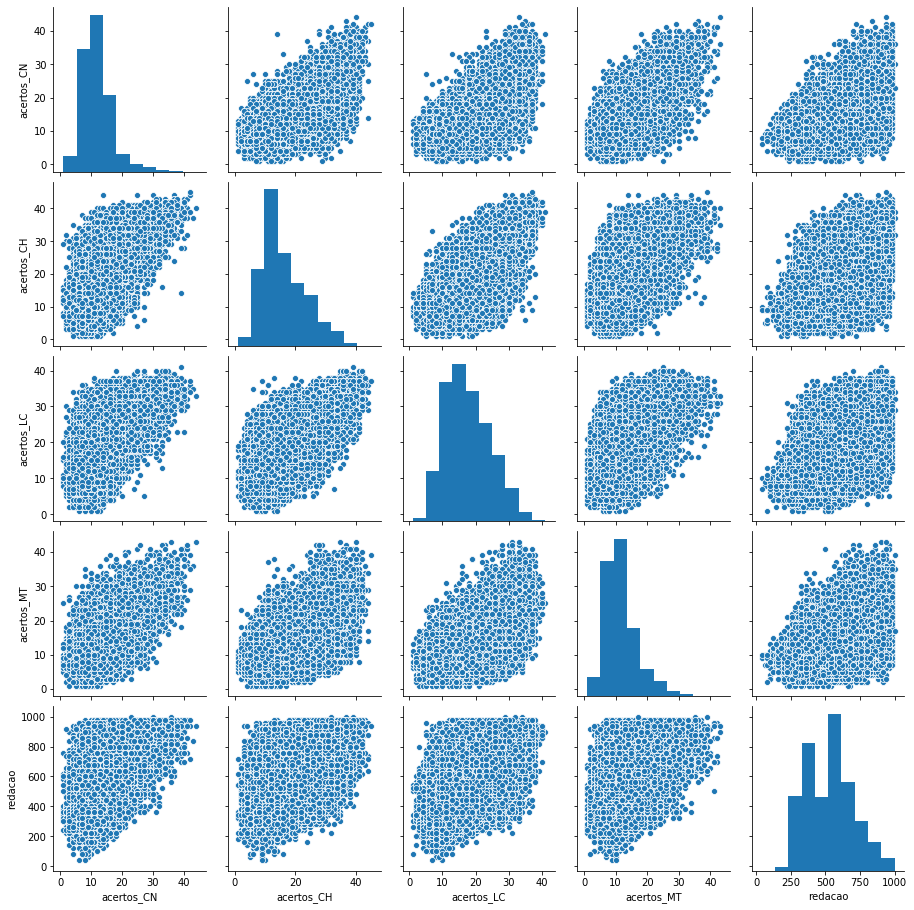

In [19]:
sns.pairplot(dados_acertos_sem_zeros)
plt.show()

> Acredito que existam muitos pontos que estão "sobrepostos", isto é, muito próximos uns dos outros, formando uma "massa". Eu gostaria de ver um mapa de calor que correlacione esses dados, assim como fizemos anteriormente, mas em cada gráfico desses. A minha ideia é que, visualizando um mapa de calor entre os pontos, poderiamos talvez encontrar algum padrão.

> Como não sei fazer, isso dei uma pesquisada e encontrei essa sugestão e plotei abaixo. Ele monta histogramas para cada relação das quantidades de acertos entre as provas e depois faz o mapa de calor em cada relação.

/home/lucas/anaconda3/envs/data_science/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


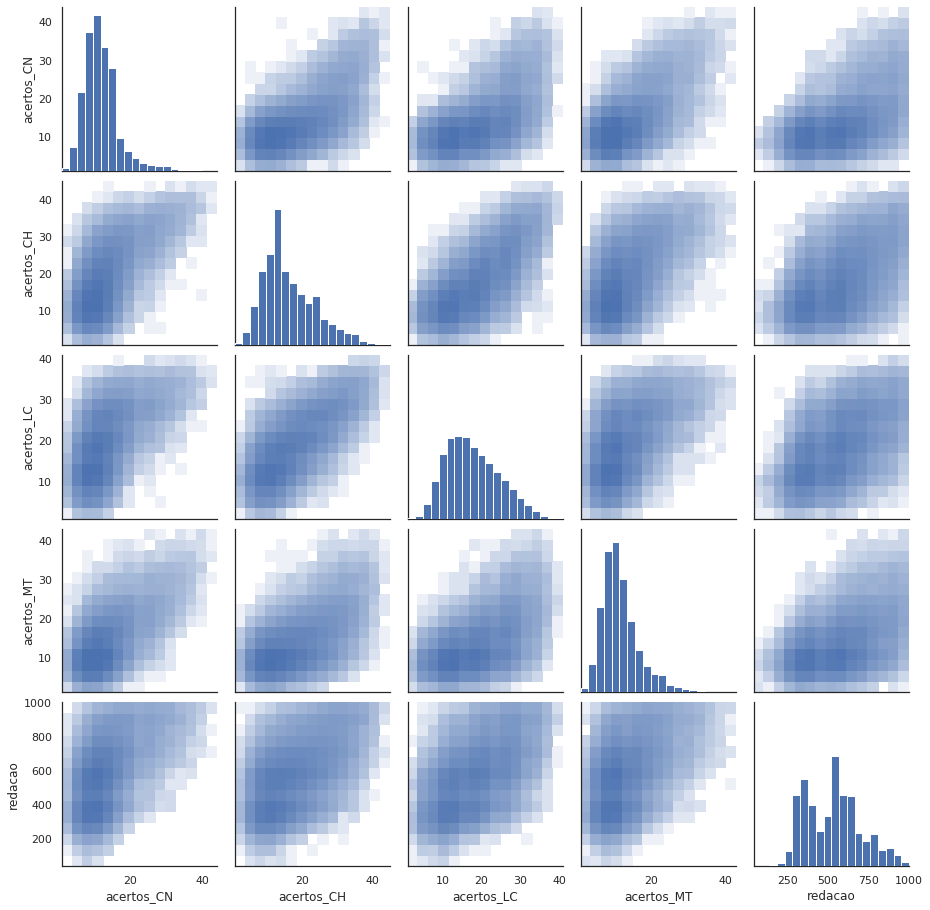

In [20]:
# Fonte: https://stackoverflow.com/questions/43924280/pair-plot-with-heat-maps-possibly-logarithmic/43924911
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

sns.set()
sns.set_style("white")

g = sns.PairGrid(dados_acertos_sem_zeros)
g.map_diag(plt.hist, bins=20)

#cmap_azul_vermelho = sns.color_palette("RdBu_r", n_colors=6)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)
    

g.map_offdiag(pairgrid_heatmap, bins=15, norm=LogNorm())
plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no Twitter, seja LinkedIn. Boa sorte!